In [20]:
import uform
from PIL import Image
import torch.nn.functional as F

In [3]:
model = uform.get_model('unum-cloud/uform-vl-english')
# model = uform.get_model('unum-cloud/uform-vl-multilingual')

Fetching 3 files:   0%|                                                                                                                                                                        | 0/3 [00:00<?, ?it/s]

Fetching 3 files: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [01:06<00:00, 22.30s/it]


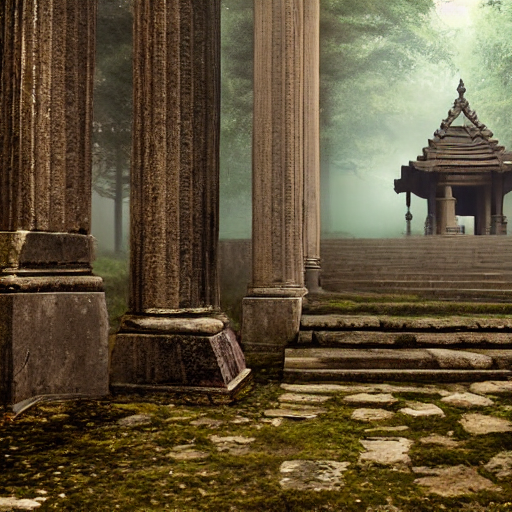

In [11]:
text = "temple in ruines, forest, stairs, columns, cinematic, detailed, Matte painting, mist"
image = image = Image.open('../data/temple.png')
image

In [12]:
image_data = model.preprocess_image(image).unsqueeze(0)
text_data = model.preprocess_text(text)

In [13]:
image_embedding = model.encode_image(image_data)
text_embedding = model.encode_text(text_data)
joint_embedding = model.encode_multimodal(image=image_data, text=text_data)

In [14]:
image_features, image_embedding = model.encode_image(image_data, return_features=True)
text_features, text_embedding = model.encode_text(text_data, return_features=True)

In [19]:
joint_embedding = model.encode_multimodal(
    image_features=image_features,
    text_features=text_features,
    attention_mask=text_data['attention_mask']
)

In [21]:
similarity = F.cosine_similarity(image_embedding, text_embedding)
similarity

tensor([0.4548], grad_fn=<SumBackward1>)

In [22]:
score = model.get_matching_scores(joint_embedding)
score

tensor([0.9999], grad_fn=<SelectBackward0>)